In [109]:
import os
os.chdir('G:\\freecloud\\ThinkpadC_space\\Desktop\\资料\\资料\\量化投资：以Python为工具\\Python Quant Book\\part 5\\027')

In [110]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY,date2num
from datetime import datetime
from matplotlib.finance import  candlestick_ohlc

In [111]:
ssec2015=pd.read_csv('ssec2015.csv')
ssec2015=ssec2015.iloc[:,1:]

In [112]:
ssec2015.head(n=3)

,Date,Open,High,Low,Close,Volume
0,2015-03-02,3332.720947,3336.760010,3298.668945,3336.284912,346400
1,2015-03-03,3317.695068,3317.695068,3260.428955,3263.052002,382000
2,2015-03-04,3264.181885,3286.587891,3250.483887,3279.532959,293600


In [113]:
ssec2015.iloc[-3:,:]

,Date,Open,High,Low,Close,Volume
19,2015-03-27,3686.134033,3710.477051,3656.831055,3691.095947,408900
20,2015-03-30,3710.612061,3795.935059,3710.612061,3786.568115,564700
21,2015-03-31,3822.987061,3835.566895,3737.042969,3747.898926,561700


In [114]:
ssec2015.Date=[date2num(datetime.strptime(date,"%Y-%m-%d"))\
               for date in ssec2015.Date]

In [115]:
type(ssec2015)   

pandas.core.frame.DataFrame

In [116]:
ssec15list=list()
for i in range(len(ssec2015)):
    ssec15list.append(ssec2015.iloc[i,:])

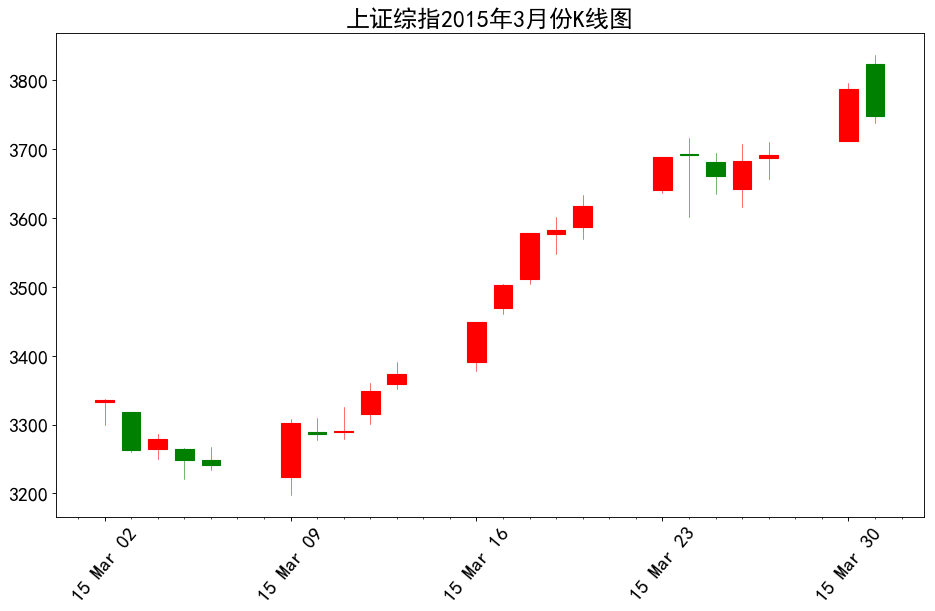

In [120]:
plt.figure(figsize=(14,8),dpi=80)
ax= plt.subplot()
mondays = WeekdayLocator(MONDAY)
weekFormatter = DateFormatter('%y %b %d')
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(DayLocator() )
ax.xaxis.set_major_formatter(weekFormatter)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
ax.set_title("上证综指2015年3月份K线图")
candlestick_ohlc(ax, ssec15list, width=0.7,colorup='r', colordown='g')
plt.setp(plt.gca().get_xticklabels(),rotation=50, horizontalalignment='center')
plt.show()

# morning star

In [17]:
ssec2012=pd.read_csv('ssec2012.csv')
ssec2012.index=ssec2012.iloc[:,1]
ssec2012.index=pd.to_datetime(ssec2012.index, format='%Y-%m-%d')
ssec2012=ssec2012.iloc[:,2:]
ssec2012.head(2)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-04,2211.995117,2217.520020,2168.644043,2169.389893,49200
2012-01-05,2160.896973,2183.404053,2145.555908,2148.451904,58800


In [18]:
ssec2012.iloc[-2:,:]

,Open,High,Low,Close,Volume
Date,,,,,
2012-12-28,2207.913086,2234.868896,2204.002930,2233.251953,116000
2012-12-31,2236.460938,2269.511963,2236.460938,2269.127930,128000


In [19]:
Close=ssec2012.Close
Open=ssec2012.Open
ClOp=Close-Open
ClOp.head()

Date
2012-01-04   -42.605224
2012-01-05   -12.445069
2012-01-06    15.248047
2012-01-09    61.148926
2012-01-10    63.911865
dtype: float64

In [20]:
ClOp.describe()

count    243.000000
mean       2.244368
std       22.884043
min      -73.685059
25%      -11.442016
50%        1.513183
75%       14.296997
max       91.843994
dtype: float64

In [21]:
Shape = [0,0,0]
lag1ClOp=ClOp.shift(1)
lag2ClOp=ClOp.shift(2)

In [22]:
for i in range(3,len(ClOp),1):
    if all([lag2ClOp[i]<-11,abs(lag1ClOp[i])<2,\
    ClOp[i]>6,abs(ClOp[i])>abs(lag2ClOp[i]*0.5)]):
        Shape.append(1)
    else:
        Shape.append(0)

In [23]:
Shape.index(1)

165

In [24]:
lagOpen=Open.shift(1)
lagClose=Close.shift(1)
lag2Close=Close.shift(2)

In [25]:
Doji=[0,0,0]
for i in range(3,len(Open),1):
    if all([lagOpen[i]<Open[i],lagOpen[i]<lag2Close[i],\
    lagClose[i]<Open[i],(lagClose[i]<lag2Close[i])]):
        Doji.append(1)
    else:
        Doji.append(0)
Doji.count(1)

12

In [26]:
ret=Close/Close.shift(1)-1
lag1ret=ret.shift(1)
lag2ret=ret.shift(2)
Trend=[0,0,0]

In [27]:
for i in range(3,len(ret)):
    if all([lag1ret[i]<0,lag2ret[i]<0]):
        Trend.append(1)
    else:
        Trend.append(0)

In [28]:
StarSig=[]

In [29]:
for i in range(len(Trend)):
    if all([Shape[i]==1,Doji[i]==1,Trend[i]==1]):
        StarSig.append(1)
    else:
        StarSig.append(0)

In [30]:
for i in range(len(StarSig)):
    if StarSig[i]==1:
        print(ssec2012.index[i])

2012-09-06 00:00:00


In [31]:
ssec201209=ssec2012['2012-08-21':'2012-09-30']

In [33]:
import matplotlib.pyplot as plt 
import matplotlib

# Need to specify path before import

E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


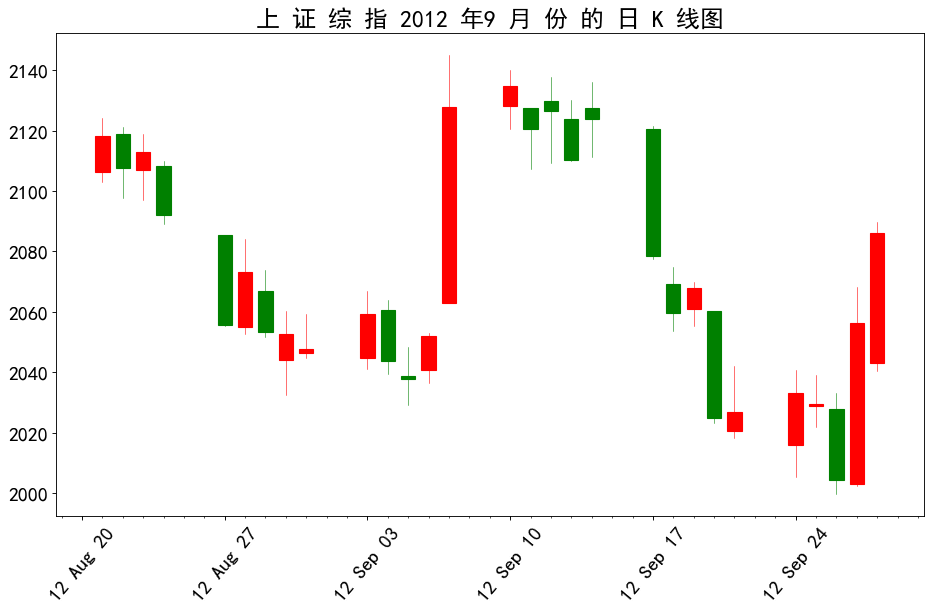

In [35]:
import candle
plt.figure(figsize=(14,8),dpi=80)
candle.candlePlot(ssec201209 ,title=' 上 证 综 指 2012 年9 月 份 的 日 K 线图 ')

# Dark Cloud Cover
# 提 取 读 入 上 证 综 指 年 的 日 交 易 数 据

In [36]:
import pandas as pd
ssec2011=pd.read_csv('ssec2011.csv')
ssec2011.index=ssec2011.iloc[:,1]
ssec2011.index=pd.to_datetime(ssec2011.index, format='%Y-%m-%d')
ssec2011=ssec2011.iloc[:,2:]

# 提 取 价 格 数 据

In [37]:
Close11=ssec2011.Close
Open11=ssec2011.Open

# 刻 画 捕 捉 符 合 “ 乌 云 盖 顶 ” 形 态 的 连 续 两 个 蜡 烛 实 体

In [38]:
lagClose11=Close11.shift(1)
lagOpen11=Open11.shift(1)
Cloud=pd.Series(0,index=Close11.index)
for i in range(1,len(Close11)):
    if all([Close11[i]<Open11[i],\
            lagClose11[i]>lagOpen11[i],\
            Open11[i]>lagClose11[i],\
            Close11[i]<0.5*(lagClose11[i]+lagOpen11[i]),\
            Close11[i]>lagOpen11[i]]):
        Cloud[i]=1

# 定 义 前 期 上 升 趋 势

In [39]:

Trend=pd.Series(0,index=Close11.index)
for i in range(2,len(Close11)):
    if Close11[i-1]>Close11[i-2]>Close11[i-3]:
        Trend[i]=1

In [40]:
darkCloud=Cloud+Trend
darkCloud[darkCloud==2]

Date
2011-05-19    2
2011-08-16    2
dtype: int64

E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\core\indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


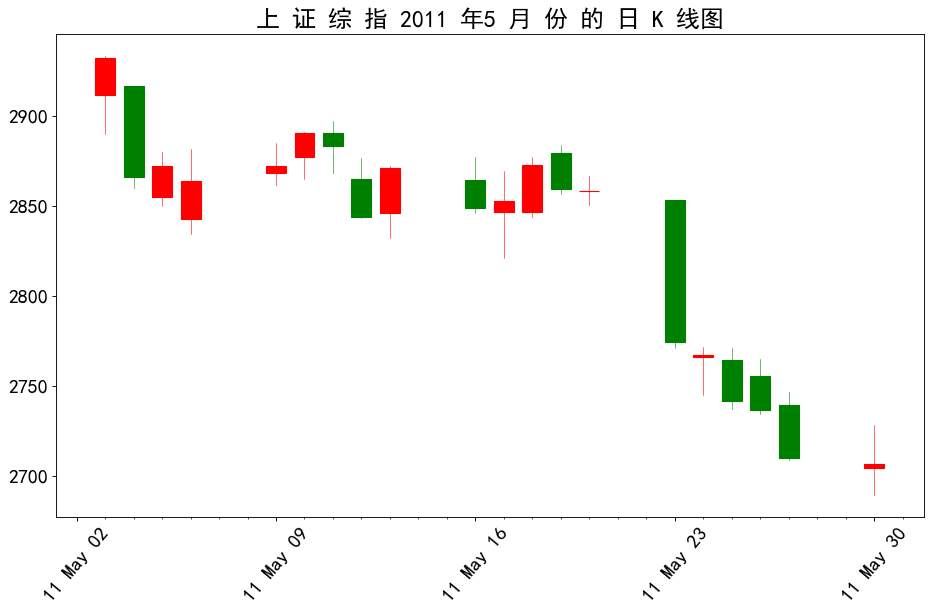

In [41]:
# 绘 制 上 证 综 指 2011 年5月 19 日 附 近 的 K 线图
ssec201105=ssec2011['2011-05-01':'2011-05-30']           
plt.figure(figsize=(14,8),dpi=80)
candle.candlePlot(ssec201105 ,\
                  title=' 上 证 综 指 2011 年5 月 份 的 日 K 线图 ')

E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\core\indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


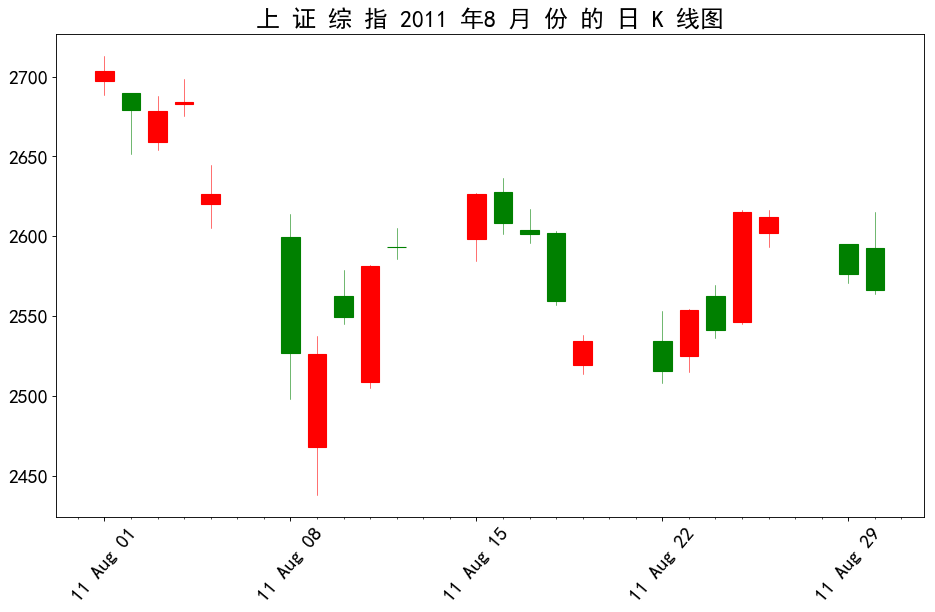

In [42]:
# 绘 制 上 证 综 指 2011 年8月 16 日 附 近 的 K 线图
ssec201108=ssec2011['2011-08-01':'2011-08-30']
plt.figure(figsize=(14,8),dpi=80)
candle.candlePlot(ssec201108 ,\
                  title=' 上 证 综 指 2011 年8 月 份 的 日 K 线图 ')


In [121]:
import pandas as pd
import os
os.chdir('G:\\freecloud\\ThinkpadC_space\\Desktop\\资料\\资料\量化投资：以Python为工具\\PythonANS')

In [131]:
import pandas as pd
import numpy as np
import candle as cd
import matplotlib.pyplot as plt

# 1.读取原数据，绘制上证综指2013年3月1日到5月1日的日K线图和成交量图
# （图形在绘制中出现日期显示重叠的情况，具体解决方法见Spyder.3.6中的temp3.6）

G:\freecloud\ThinkpadC_space\Desktop\资料\资料\量化投资：以Python为工具\Python Quant Book\part 5\027\candle.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  seriesData['Date']=Date


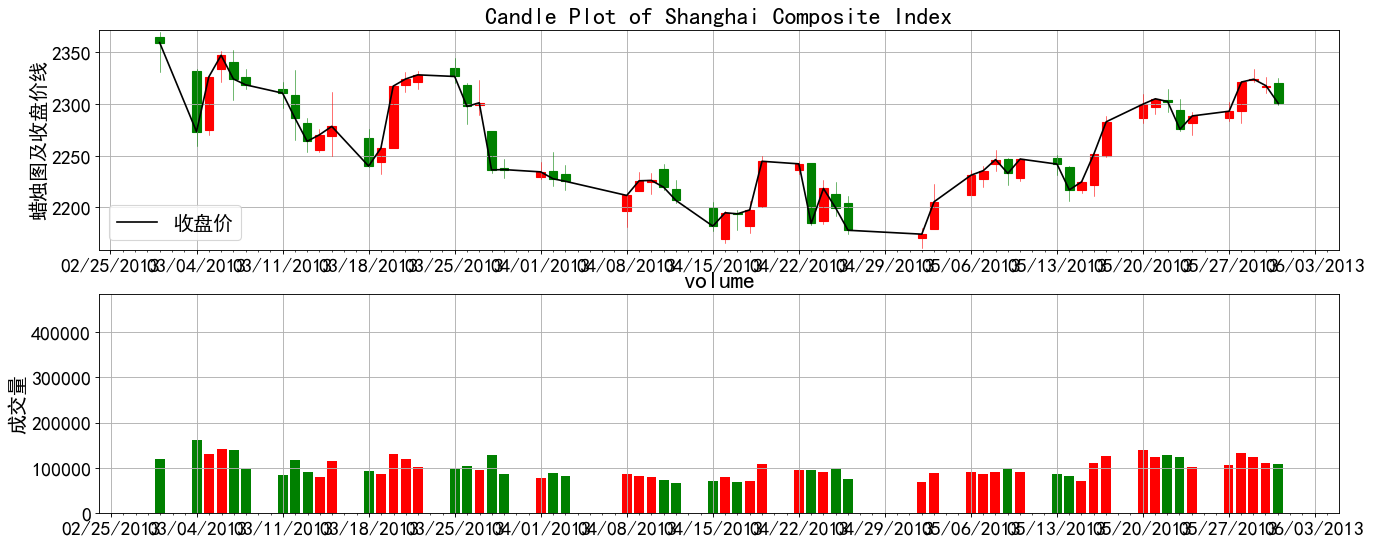

In [132]:
shzheng = pd.read_csv('Data/Part5/001/problem27-1.csv',
                index_col='date')              
shzheng.index.name='Date'
shzheng.index = pd.to_datetime(shzheng.index,format='%Y-%m-%d')
shzheng13=shzheng['2013-03-01':'2013-05-31']
plt.figure(figsize=(20,8),dpi=80)
cd.candleVolume(shzheng13,
		candletitle='Candle Plot of Shanghai Composite Index',
		bartitle='volume')

# 2.读取原数据，绘制上证指数2013年上半年的日K线图，找出并打印“十字星”形态出现的日期

In [47]:
shzheng = pd.read_csv('Data/Part5/001/problem27-2.csv',
                index_col='date')               
shzheng.index.name='Date'
shzheng.index = pd.to_datetime(shzheng.index,format='%Y-%m-%d')
shzheng131=shzheng['2013-01-01':'2013-06-30']

In [48]:
CL_OP = shzheng131.Close - shzheng131.Open
CL_OP.describe()

count     78.000000
mean      -1.854376
std       25.289310
min     -105.627076
25%      -15.605286
50%        0.348023
75%       11.783997
max       59.637939
dtype: float64

In [49]:
Doji = pd.Series(np.where(np.abs(CL_OP.values)<8,1,0),
	index=CL_OP.index)
Doji[Doji==1].index 

DatetimeIndex(['2013-03-01', '2013-03-08', '2013-03-11', '2013-03-21',
               '2013-03-22', '2013-03-27', '2013-03-29', '2013-04-01',
               '2013-04-02', '2013-04-03', '2013-04-10', '2013-04-17',
               '2013-04-22', '2013-05-02', '2013-05-07', '2013-05-08',
               '2013-05-13', '2013-05-15', '2013-05-22', '2013-05-24',
               '2013-05-27', '2013-05-29', '2013-05-30', '2013-06-03',
               '2013-06-05', '2013-06-18', '2013-06-19', '2013-06-26',
               '2013-06-27'],
              dtype='datetime64[ns]', name='Date', freq=None)

E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


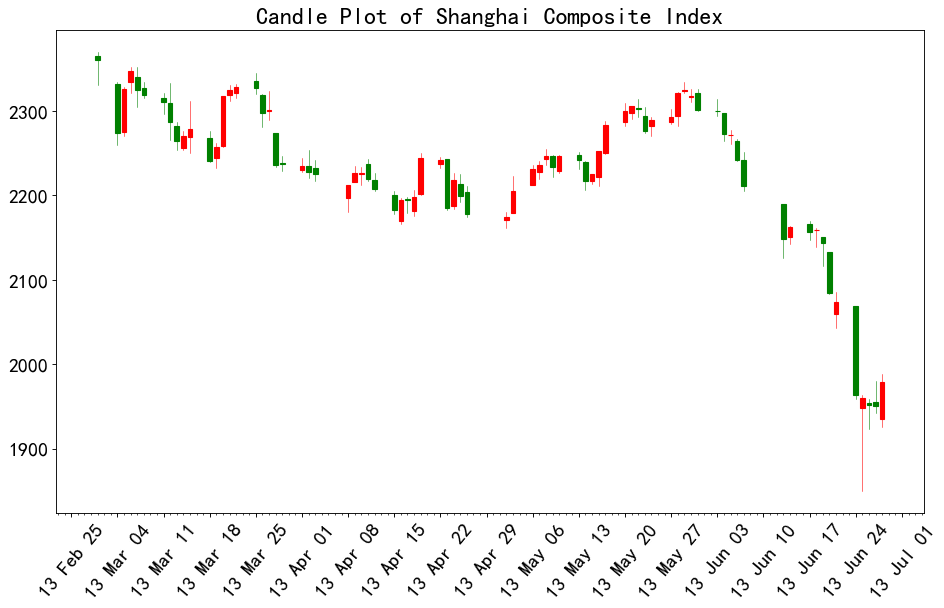

In [50]:
plt.figure(figsize=(14,8),dpi=80)
cd.candlePlot(shzheng131,
	title='Candle Plot of Shanghai Composite Index')

# 3.读取上证综指2012年度的日交易数据，捕捉“黄昏之星”形态出现的日期

In [96]:
shzheng = pd.read_csv('Data/Part5/001/problem27-3.csv',
                index_col='date')
                
shzheng.index.name='Date'

shzheng.index = pd.to_datetime(shzheng.index,format='%Y-%m-%d')

CL_OP = shzheng.Close - shzheng.Open

CL_OP.describe()

dat = pd.concat([CL_OP,CL_OP.shift(1),CL_OP.shift(2)],1)

candle = np.all([np.abs(dat.iloc[:,1])<=3,dat.iloc[:,2]>11,
                 dat.iloc[:,0]<-6,
                 np.abs(dat.iloc[:,0])<np.abs(dat.iloc[:,2])/2],
                 0)

dataCOP = pd.concat([shzheng.Close,shzheng.Open.shift(1),
                     shzheng.Close.shift(1),shzheng.Open.shift(2)],1)
                     
Doji = np.all([dataCOP.iloc[:,1]>dataCOP.iloc[:,3],dataCOP.iloc[:,1]>dataCOP.iloc[:,0],
               dataCOP.iloc[:,2]>dataCOP.iloc[:,3],dataCOP.iloc[:,2]>dataCOP.iloc[:,0]],0)              
ret = (shzheng.Close-shzheng.Close.shift(1))/shzheng.Close.shift(1)
trend = np.all([ret.shift(2)>0,ret.shift(1)>0],0)


# signal的长度为0，即没有符合“黄昏之星”形态的日期

In [97]:
signal = np.all([candle,Doji,trend],0)
sum(signal)

0

# 读取上证综指2012年度的日交易数据，捕捉“黄昏之星”出现的日期
# ①刻画蜡烛实体

In [78]:
shzheng = pd.read_csv('Data/Part5/001/problem27-3.csv',
                index_col='date')
shzheng.index.name='Date'

shzheng.index = pd.to_datetime(shzheng.index,format='%Y-%m-%d')

shzheng=shzheng.iloc[:,:5]

shzheng.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-04,2211.995117,2217.520020,2168.644043,2169.389893,49200
2012-01-05,2160.896973,2183.404053,2145.555908,2148.451904,58800
2012-01-06,2148.146973,2164.322021,2132.625977,2163.395020,50600
2012-01-09,2164.740967,2226.218018,2148.452881,2225.889893,76800
2012-01-10,2221.832031,2288.627930,2218.274902,2285.743896,109600


In [79]:
shzheng.iloc[-2:,:]

,Open,High,Low,Close,Volume
Date,,,,,
2012-12-28,2207.913086,2234.868896,2204.002930,2233.251953,116000
2012-12-31,2236.460938,2269.511963,2236.460938,2269.127930,128000


In [80]:
Close=shzheng.Close

Open=shzheng.Open

In [93]:
ClOp=Close-Open
ClOp.head()
ClOp.describe()

count    243.000000
mean       2.244368
std       22.884043
min      -73.685059
25%      -11.442016
50%        1.513183
75%       14.296997
max       91.843994
dtype: float64

In [94]:
Shape = [0,0,0]
lag1ClOp=ClOp.shift(1)
lag2ClOp=ClOp.shift(2)

In [95]:
for i in range(3,len(ClOp),1):
    if all([lag2ClOp[i]>11,abs(lag1ClOp[i])<=3,\
    ClOp[i]<-6,abs(ClOp[i])<abs(lag2ClOp[i]*0.5)]):
        Shape.append(1)
    else:
        Shape.append(0)

# 刻画蜡烛实体结果日期数为0，“黄昏之星”日期捕捉结束

In [91]:
Shape.index(0)

0

# 4.使用上证综指2011年交易数据，捕获日K线图中出现“看跌吞没”形态的日期

In [101]:
shzheng = pd.read_csv('Data/Part5/001/problem27-4.csv',
                index_col='date')
                
shzheng.index.name='Date'
shzheng.index = pd.to_datetime(shzheng.index,format='%Y-%m-%d')
CL_OP = shzheng.Close - shzheng.Open
candle = np.all([CL_OP<0,CL_OP.shift(1)>0],0)
diffPrice = np.all([shzheng.Open>shzheng.Close.shift(1),shzheng.Close<shzheng.Open.shift(1)],0)
ret = (shzheng.Close-shzheng.Close.shift(1))/shzheng.Close.shift(1)
trend = np.all([ret.shift(2)>0,ret.shift(1)>0],0)
signal = np.all([candle,diffPrice,trend],0)

# signal的长度为0，即没有符合“看跌吞没”形态的日期

In [102]:
sum(signal)

0

# 5.读取原数据
# ①捕捉“倾盆大雨”形态出现的日期

In [103]:
CL_OP.describe()
candle = np.all([CL_OP<0,CL_OP.shift(1)>17],0)
diffPrice = np.all([shzheng.Close<shzheng.Open.shift(1)],0)
trend = np.all([ret.shift(1)>0,ret.shift(2)>0],0)
signal = pd.Series(np.all([candle,diffPrice,trend],0),index=CL_OP.index)
signal[signal==True]

Date
2011-01-20    True
2011-05-04    True
2011-09-22    True
dtype: bool

# ②绘制“倾盆大雨”形态出现日期附近的K线图，分析K线图走势并检验①中捕捉到的信号真假

E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\core\indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


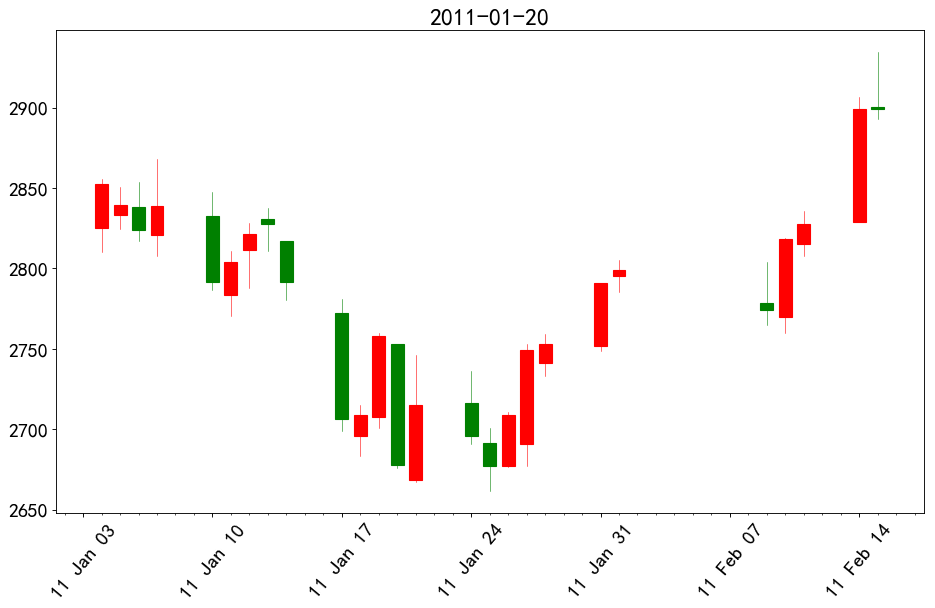

In [106]:
plt.figure(figsize=(14,8),dpi=80)
cd.candlePlot(shzheng['2011-01-01':'2011-02-15'],'2011-01-20')

E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\core\indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


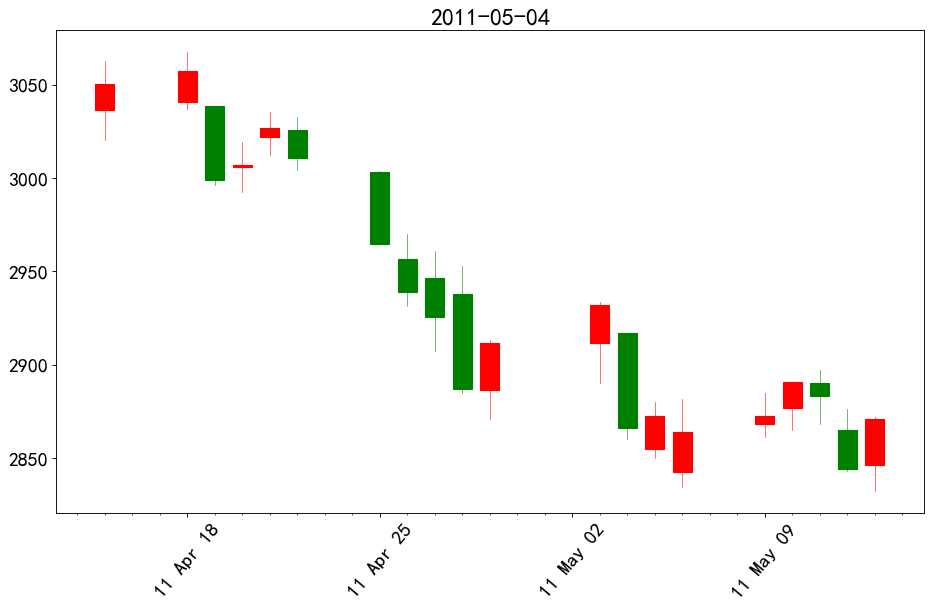

In [107]:
plt.figure(figsize=(14,8),dpi=80)
cd.candlePlot(shzheng['2011-04-15':'2011-05-15'],'2011-05-04')


E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\core\indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


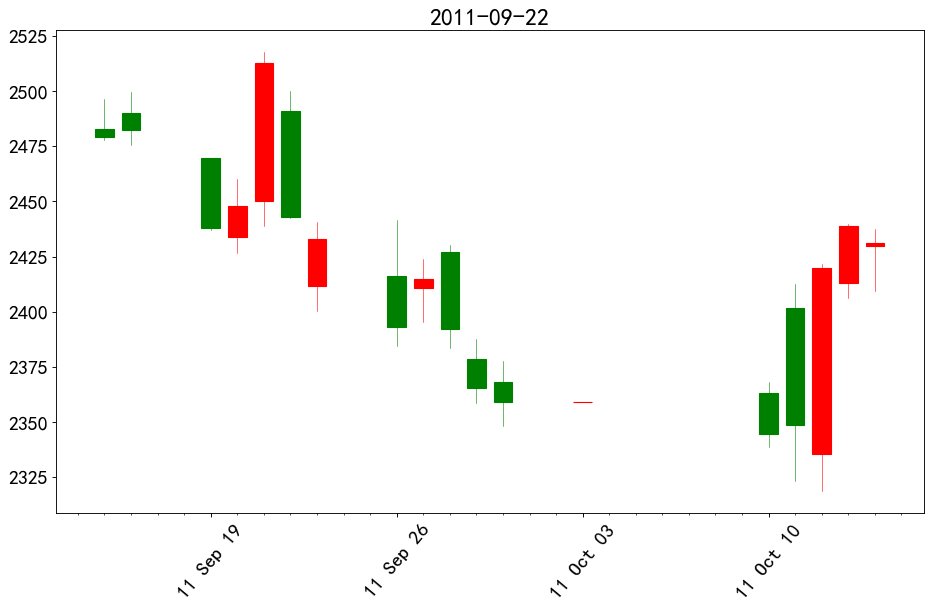

In [108]:
plt.figure(figsize=(14,8),dpi=80)
cd.candlePlot(shzheng['2011-09-15':'2011-10-15'],'2011-09-22')